# 1. MODULO

In [29]:
# Importa el módulo 'os' para interactuar con el sistema de archivos y rutas del sistema operativo
import os

# Importa 'pandas' como 'pd', una biblioteca potente para manipulación y análisis de datos mediante DataFrames
import pandas as pd

# Importa el módulo 'datetime' para trabajar con fechas y horas de manera eficiente
import datetime

# 2. Rutas Y variables
## 2.1. Oficce

#R_Consoliado_Sat = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SAT\CONTRIBUTIVO\All\SAT_EPSC25_2025.TXT"
#R_Historico = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Historico\2025\20250629-HISTORICOS\HISTORIA_IDENTIFICACION.TXT"
#R_Maestro = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Maestro\All\Min\2025_Mínim.txt"

R_Consoliado_Sat = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SAT\SUBSIDIADO\All\SAT_EPS025_2025.TXT"
R_Historico = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Historico\2025\20250629-HISTORICOS\HISTORICO_IDENTIFICACION_S_E.TXT"
R_Maestro = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\All\Min\2025_Mínim.txt"

ano = 2025
Regimen = "EPS025"
#Regimen = "EPSC25"
R_Salida = fr"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\Estadisticas\{ano} SAT ENTRADA y SALIDA {Regimen}.TXT"


## 2.2. Home

In [30]:
Regimen = "EPS025"
#Regimen = "EPSC25"


if Regimen == "EPSC25":
    R_Consoliado_Sat = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SAT\CONTRIBUTIVO\All\SAT_EPSC25_2025.TXT"
    R_Historico = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Historico\2025\20250629-HISTORICOS\HISTORIA_IDENTIFICACION.TXT"
    R_Maestro = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Maestro\All\Min\2025_Mínim.txt"
else:
    R_Consoliado_Sat = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SAT\SUBSIDIADO\All\SAT_EPS025_2025.TXT"
    R_Historico = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Historico\2025\20250629-HISTORICOS\HISTORICO_IDENTIFICACION_S_E.TXT"
    R_Maestro = r"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\All\Min\2025_Mínim.txt"


ano = 2025

R_Salida_IMG = fr"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\Estadisticas\Graficas\{Regimen}\{ano}"
R_Salida = fr"C:\Users\crist\OneDrive - uniminuto.edu\Capresoca\Estadisticas\{ano} SAT ENTRADA y SALIDA {Regimen}.TXT"


# 3. CARGUE DATAFRAME

In [31]:
df_sat = pd.read_csv(R_Consoliado_Sat, sep='|', encoding='ansi', dtype=str)
df_sat.head()

,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,COL10,...,COL77,COL78,COL79,COL80,COL81,COL82,COL83,COL84,COL85,COL86
0,10-01-2025,2,4,069CC3994868009012025150400002,2025-01-09T15:05:23,NaN,NaN,NaN,CC,39948680,...,S,S,S,S,S,N,NaN,NaN,NaN,NaN
1,10-01-2025,3,4,069CC416046509012025141900003,2025-01-09T14:23:39,NaN,NaN,NaN,CC,4160465,...,S,S,S,S,S,N,NaN,NaN,NaN,NaN
2,10-01-2025,4,14,069CC3994868009012025150400002,2025-01-09T15:05:23,NaN,NaN,NaN,CC,39948680,...,S,S,S,S,S,N,NaN,NaN,NaN,NaN
3,10-01-2025,5,14,069CC100685915909012025154600002,2025-01-09T15:49:30,NaN,NaN,NaN,CC,1006859159,...,N,S,S,S,S,N,NaN,NaN,NaN,NaN
4,10-01-2025,6,4,069CC111857275409012025151600002,2025-01-09T15:17:58,NaN,NaN,NaN,CC,1118572754,...,N,S,S,S,S,N,NaN,NaN,NaN,NaN


In [32]:
# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat[df_sat["COL24"] == "42490216"]
print(registros_filtrados)

            COL1 COL2 COL3                            COL4  \
388   23-01-2025   16    4  069CC4249021622012025111600001   
389   23-01-2025   17   14  069CC4249021622012025111600001   
4401  27-06-2025    4    4  069CC4249021626062025151600017   
4402  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL6 COL7 COL8 COL9     COL10  ... COL77 COL78  \
388   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
389   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
4401  2025-06-26T15:18:48  NaN  NaN  NaN   CC  42490216  ...     N     S   
4402  2025-06-26T15:19:05  NaN  NaN  NaN   CC  42490216  ...     N     S   

     COL79 COL80 COL81 COL82 COL83 COL84 COL85 COL86  
388      S     S     S     N   NaN   NaN   NaN   NaN  
389      S     S     S     N   NaN   NaN   NaN   NaN  
4401     S     S     S     N   NaN   NaN   NaN   NaN  
4402     S     S     S     N   NaN   NaN   NaN   NaN  

[4 rows x 86 columns]


In [33]:
# Intenta con latin1
try:
    df_HI = pd.read_csv(R_Historico, sep=',', encoding='latin1', dtype=str, header=None)
    print("Archivo leído con éxito usando 'latin1'.")
except UnicodeDecodeError:
    print("Error con 'latin1'. Intentando con 'cp1252'.")
    # Si falla, intenta con cp1252
    df_HI = pd.read_csv(R_Historico, sep=',', encoding='cp1252', dtype=str, header=None)
    print("Archivo leído con éxito usando 'cp1252'.")

df_HI.head()

Archivo leído con éxito usando 'latin1'.


,0,1,2,3,4,5
0,104413898,CC,1073246014,02/08/2018,31/12/2999,EPS025
1,90652775,RC,1005065465,01/12/2005,26/06/2008,EPS025
2,94845649,CC,1193339663,01/12/2014,31/12/2999,EPS025
3,68213378,CC,9526502,16/12/2001,31/12/2999,EPS025
4,113416408,TI,1115865996,19/11/2024,31/12/2999,EPS025


In [34]:
df_Maestro = pd.read_csv(R_Maestro, sep=',', encoding='ansi', dtype=str)
df_Maestro.head()

,AFL_ID,ENT_ID,TPS_IDN_ID_CF,HST_IDN_NUMERO_IDENTIFICACION_CF,TPS_IDN_ID,HST_IDN_NUMERO_IDENTIFICACION,AFL_PRIMER_APELLIDO,AFL_SEGUNDO_APELLIDO,AFL_PRIMER_NOMBRE,AFL_SEGUNDO_NOMBRE,...,CND_AFL_FECHA_INICIO_2,GRP_FML_COTIZANTE_ID,PORTABILIDAD,COD_IPS_P,MTDLG_G_P,SUB_SISBEN_IV,MARCASISBENIV+MARCASISBENIII,CRUCE_BDEX_RNEC,nombre_archivo,fecha_maestro
0,117350752,EPS025,CC,1118562505,RC,1222137586,GAITAN,VIÑA,JESUS,MATEO,...,NaN,96457920,0,NaN,2,B01,SIV(B01),0,EPS025MS0003012025.TXT,03/01/2025
1,69415089,EPS025,NaN,NaN,CC,74812086,MALDONADO,NaN,JUAN,BAUTISTA,...,NaN,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0003012025.TXT,03/01/2025
2,25829611,EPS025,NaN,NaN,CC,74812268,CACHAY,MALDONADO,JOSE,LEONICELDO,...,NaN,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0003012025.TXT,03/01/2025
3,73104603,EPS025,NaN,NaN,CC,23906207,COTINCHARA,DE PEREIRA,EUSEBIA,NaN,...,NaN,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0003012025.TXT,03/01/2025
4,69414419,EPS025,NaN,NaN,CC,23906077,LARGO,DE PIRABAN,EMILIANA,NaN,...,NaN,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0003012025.TXT,03/01/2025


# 4. LIMPIEZA DE DATOS

En esta sección, realizaremos un proceso de limpieza de datos para identificar inconsistencias y columnas que posiblemente no sean necesarias para el análisis. Esto incluye:

- Análisis de columnas vacías.
- Análisis de columnas de fechas.
- Identificación de posibles errores de tipificación.

## 4.1 Análisis de Columnas Vacías

En esta subsección, identificaremos las columnas que tienen un alto porcentaje de valores vacíos. Esto nos ayudará a decidir si estas columnas son relevantes para el análisis o si pueden ser eliminadas.

In [35]:
# Identificar posibles errores de tipificación
def identificar_errores_tipificacion(df):
    for col in df.columns:
        if df[col].dtype == "object":
            try:
                df[col].astype(float)
                print(f"Posible error: La columna '{col}' contiene valores numéricos pero está tipificada como texto.")
            except ValueError:
                pass
        elif df[col].dtype in ["int64", "float64"]:
            if df[col].apply(lambda x: isinstance(x, str)).any():
                print(f"Posible error: La columna '{col}' contiene texto pero está tipificada como numérica.")

# Aplicar la función al DataFrame
identificar_errores_tipificacion(df_sat)

Posible error: La columna 'COL2' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL3' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL7' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL10' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL17' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL22' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL31' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL32' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL38' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL39' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL43' contiene valores numéricos pe

## Análisis de Columnas de Fechas

En esta subsección, verificaremos las columnas que contienen fechas para identificar valores fuera de rango o inconsistencias en el formato.

In [36]:
# Identificar columnas de tipo fecha
def analizar_columnas_fechas(df):
    columnas_fecha = [col for col in df.columns if "fecha" in col.lower()]
    for col in columnas_fecha:
        print(f"Análisis de la columna: {col}")
        print(f"Rango de fechas: {df[col].min()} - {df[col].max()}")
        print(f"Valores únicos: {df[col].nunique()}")

# Aplicar la función al DataFrame
analizar_columnas_fechas(df_sat)

## Identificación de Errores de Tipificación

En esta subsección, revisaremos las columnas para identificar posibles errores de tipificación, como valores numéricos en columnas categóricas o texto en columnas numéricas.

In [37]:
# Calcular el porcentaje de valores vacíos por columna
def calcular_porcentaje_vacios(df):
    porcentaje_vacios = df.isnull().mean() * 100
    return porcentaje_vacios

# Aplicar la función al DataFrame y mostrar las columnas con más del 80% de valores vacíos
porcentaje_vacios = calcular_porcentaje_vacios(df_sat)
columnas_vacias = porcentaje_vacios[porcentaje_vacios > 80]

print("Columnas con más del 80% de valores vacíos:")
print(columnas_vacias)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat[df_sat["COL24"] == "42490216"]
print(registros_filtrados)

Columnas con más del 80% de valores vacíos:
COL49     85.462963
COL50     92.296296
COL51     92.259259
COL52     92.259259
COL53     92.259259
COL54     92.314815
COL55     92.388889
COL56    100.000000
COL57     92.388889
COL58    100.000000
COL59    100.000000
COL60    100.000000
COL61    100.000000
COL62    100.000000
COL63     92.388889
COL65    100.000000
COL66    100.000000
COL75     99.351852
COL76     99.351852
dtype: float64
            COL1 COL2 COL3                            COL4  \
388   23-01-2025   16    4  069CC4249021622012025111600001   
389   23-01-2025   17   14  069CC4249021622012025111600001   
4401  27-06-2025    4    4  069CC4249021626062025151600017   
4402  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL6 COL7 COL8 COL9     COL10  ... COL77 COL78  \
388   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
389   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
4401  2025-06-26T15:18

## Eliminacion de Columnas Vacias

In [38]:
# Mostrar número de registros y columnas antes de eliminar
print("Antes de eliminar:")
print(f"Registros: {df_sat.shape[0]}, Columnas: {df_sat.shape[1]}")

# Eliminar columnas con más del 50% de valores vacíos
df_sat_limpio = df_sat.drop(columns=columnas_vacias.index)

# Mostrar número de registros y columnas después de eliminar
print("Después de eliminar:")
print(f"Registros: {df_sat_limpio.shape[0]}, Columnas: {df_sat_limpio.shape[1]}")

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Antes de eliminar:
Registros: 5400, Columnas: 86
Después de eliminar:
Registros: 5400, Columnas: 67
            COL1 COL2 COL3                            COL4  \
388   23-01-2025   16    4  069CC4249021622012025111600001   
389   23-01-2025   17   14  069CC4249021622012025111600001   
4401  27-06-2025    4    4  069CC4249021626062025151600017   
4402  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL6 COL7 COL8 COL9     COL10  ... COL77 COL78  \
388   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
389   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
4401  2025-06-26T15:18:48  NaN  NaN  NaN   CC  42490216  ...     N     S   
4402  2025-06-26T15:19:05  NaN  NaN  NaN   CC  42490216  ...     N     S   

     COL79 COL80 COL81 COL82 COL83 COL84 COL85 COL86  
388      S     S     S     N   NaN   NaN   NaN   NaN  
389      S     S     S     N   NaN   NaN   NaN   NaN  
4401     S     S     S     N   NaN   NaN   

## VALIDAR EVOLUCIONES DC

In [39]:
# Mostrar número de registros vacíos en COL23 y COL24 antes del proceso
vacios_antes_col23 = df_sat_limpio['COL23'].isnull().sum() + (df_sat_limpio['COL23'].str.strip() == '').sum()
vacios_antes_col24 = df_sat_limpio['COL24'].isnull().sum() + (df_sat_limpio['COL24'].str.strip() == '').sum()
print(f"Registros vacíos en COL23 antes: {vacios_antes_col23}")
print(f"Registros vacíos en COL24 antes: {vacios_antes_col24}")

# Copiar valores de COL21 y COL22 a COL23 y COL24 cuando estén vacías
mask_col23 = df_sat_limpio['COL23'].isnull() | (df_sat_limpio['COL23'].str.strip() == '')
mask_col24 = df_sat_limpio['COL24'].isnull() | (df_sat_limpio['COL24'].str.strip() == '')

if 'COL21' in df_sat.columns and 'COL22' in df_sat.columns:
    df_sat_limpio.loc[mask_col23, 'COL23'] = df_sat.loc[df_sat_limpio.index[mask_col23], 'COL21']
    df_sat_limpio.loc[mask_col24, 'COL24'] = df_sat.loc[df_sat_limpio.index[mask_col24], 'COL22']

# Mostrar número de registros vacíos en COL23 y COL24 después del proceso
vacios_despues_col23 = df_sat_limpio['COL23'].isnull().sum() + (df_sat_limpio['COL23'].str.strip() == '').sum()
vacios_despues_col24 = df_sat_limpio['COL24'].isnull().sum() + (df_sat_limpio['COL24'].str.strip() == '').sum()
print(f"Registros vacíos en COL23 después: {vacios_despues_col23}")
print(f"Registros vacíos en COL24 después: {vacios_despues_col24}")

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Registros vacíos en COL23 antes: 1124
Registros vacíos en COL24 antes: 1124
Registros vacíos en COL23 después: 0
Registros vacíos en COL24 después: 0
            COL1 COL2 COL3                            COL4  \
388   23-01-2025   16    4  069CC4249021622012025111600001   
389   23-01-2025   17   14  069CC4249021622012025111600001   
4401  27-06-2025    4    4  069CC4249021626062025151600017   
4402  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL6 COL7 COL8 COL9     COL10  ... COL77 COL78  \
388   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
389   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
4401  2025-06-26T15:18:48  NaN  NaN  NaN   CC  42490216  ...     N     S   
4402  2025-06-26T15:19:05  NaN  NaN  NaN   CC  42490216  ...     N     S   

     COL79 COL80 COL81 COL82 COL83 COL84 COL85 COL86  
388      S     S     S     N   NaN   NaN   NaN   NaN  
389      S     S     S     N   NaN   NaN   NaN  

## Eliminación Registros de actualización de datos

Actualización de datos y evoluciones

In [40]:
# Eliminar registros donde COL3 sea igual a "4" y "3"
df_sat_limpio = df_sat_limpio[~df_sat_limpio['COL3'].isin(["4", "3"])]

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

            COL1 COL2 COL3                            COL4  \
389   23-01-2025   17   14  069CC4249021622012025111600001   
4402  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL6 COL7 COL8 COL9     COL10  ... COL77 COL78  \
389   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
4402  2025-06-26T15:19:05  NaN  NaN  NaN   CC  42490216  ...     N     S   

     COL79 COL80 COL81 COL82 COL83 COL84 COL85 COL86  
389      S     S     S     N   NaN   NaN   NaN   NaN  
4402     S     S     S     N   NaN   NaN   NaN   NaN  

[2 rows x 67 columns]


## DEFINIR COLUMNAS

In [41]:
# Mostrar dimensiones antes de seleccionar columnas
print("Dimensiones antes:", df_sat_limpio.shape)

# Seleccionar las columnas requeridas (corrigiendo el espacio en 'COL 18')
columnas_a_trabajar = ['COL1', 'COL3', 'COL16', 'COL18', 'COL23', 'COL24', 'COL64']
df_sat_limpio = df_sat_limpio[columnas_a_trabajar]

# Mostrar dimensiones después de seleccionar columnas
print("Dimensiones después:", df_sat_limpio.shape)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Dimensiones antes: (2713, 67)
Dimensiones después: (2713, 7)
            COL1 COL3   COL16   COL18 COL23     COL24       COL64
389   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01
4402  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01


## QUITAR DUPLICADOS

In [42]:
# Mostrar el DataFrame antes de eliminar duplicados y vacíos
print("Antes de eliminar duplicados y vacíos:")
print(df_sat_limpio.shape)

# Eliminar filas donde COL23 o COL24 estén vacíos (NaN o cadena vacía)
df_sat_limpio = df_sat_limpio.dropna(subset=['COL23', 'COL24'])
df_sat_limpio = df_sat_limpio[(df_sat_limpio['COL23'].str.strip() != '') & (df_sat_limpio['COL24'].str.strip() != '')]

# Eliminar duplicados considerando las 6 columnas como un solo ID
df_sat_limpio = df_sat_limpio.drop_duplicates(subset=['COL1', 'COL3', 'COL16', 'COL18', 'COL23', 'COL24'])

# Mostrar el DataFrame después del proceso
print("Después de eliminar duplicados y vacíos:")
print(df_sat_limpio.shape)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Antes de eliminar duplicados y vacíos:
(2713, 7)
Después de eliminar duplicados y vacíos:
(2703, 7)
            COL1 COL3   COL16   COL18 COL23     COL24       COL64
389   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01
4402  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01


## ELM DE MOVILIDAD

In [43]:
# Mostrar dimensiones antes de eliminar registros
print("Dimensiones antes de eliminar registros:", df_sat_limpio.shape)

# Eliminar registros donde (COL16 = 'EPSC25' y COL18 = 'EPS025') o (COL16 = 'EPS025' y COL18 = 'EPSC25')
condicion = ((df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'] == 'EPS025')) | \
            ((df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'] == 'EPSC25'))
df_sat_limpio = df_sat_limpio[~condicion]

# Mostrar dimensiones después de eliminar registros
print("Dimensiones después de eliminar registros:", df_sat_limpio.shape)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Dimensiones antes de eliminar registros: (2703, 7)
Dimensiones después de eliminar registros: (2219, 7)
            COL1 COL3   COL16   COL18 COL23     COL24       COL64
389   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01
4402  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01


## CATEGORIZAR BD

In [44]:
# Mostrar dimensiones antes de crear la columna
print("Dimensiones antes:", df_sat_limpio.shape)

if Regimen == "EPS025":
    # Crear la columna 'tipo_Proceso' según las condiciones dadas
    cond_entrada_1 = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'].isnull())
    cond_entrada_2 = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'].str.strip() == '')
    cond_entrada_3 = (df_sat_limpio['COL16'] != 'EPS025') & (df_sat_limpio['COL18'] == 'EPS025')
    cond_entrada_4 = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'] == 'EPS025')

    cond_entrada = cond_entrada_1 | cond_entrada_2 | cond_entrada_3 | cond_entrada_4
    cond_salida = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'] != 'EPS025') & (~df_sat_limpio['COL18'].isnull()) & (df_sat_limpio['COL18'].str.strip() != '')
else:
    # Crear la columna 'tipo_Proceso' según las condiciones dadas
    cond_entrada_1 = (df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'].isnull())
    cond_entrada_2 = (df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'].str.strip() == '')
    cond_entrada_3 = (df_sat_limpio['COL16'] != 'EPSC25') & (df_sat_limpio['COL18'] == 'EPSC25')
    cond_entrada_4 = (df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'] == 'EPSC25')

    cond_entrada = cond_entrada_1 | cond_entrada_2 | cond_entrada_3 | cond_entrada_4
    cond_salida = (df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'] != 'EPSC25') & (~df_sat_limpio['COL18'].isnull()) & (df_sat_limpio['COL18'].str.strip() != '')

df_sat_limpio['tipo_Proceso'] = None
df_sat_limpio.loc[cond_entrada, 'tipo_Proceso'] = 'ENTRADA'
df_sat_limpio.loc[cond_salida, 'tipo_Proceso'] = 'SALIDA'

# Mostrar dimensiones después de crear la columna
print("Dimensiones después:", df_sat_limpio.shape)

# Mostrar porcentaje de cada categoría y verificar si hay registros sin categoría
porcentaje_categorias = df_sat_limpio['tipo_Proceso'].value_counts(dropna=False, normalize=True) * 100
print("Porcentaje de categorías en 'tipo_Proceso':")
print(porcentaje_categorias)

Dimensiones antes: (2219, 7)
Dimensiones después: (2219, 8)
Porcentaje de categorías en 'tipo_Proceso':
tipo_Proceso
SALIDA     60.567823
ENTRADA    39.432177
Name: proportion, dtype: float64


## ID BDUA

In [45]:
# Mostrar dimensiones antes de agregar la columna
print("Dimensiones antes:", df_sat_limpio.shape)

# Crear un nuevo identificador único combinando las columnas 1 y 2 de df_HI
df_HI['unique_id'] = df_HI[1].str.strip() + " " + df_HI[2].str.strip()

# Crear un diccionario para mapear el identificador único al serial (columna 0)
id_to_serial = df_HI.set_index('unique_id')[0].to_dict()

# Crear un nuevo identificador único combinando las columnas COL23 y COL24 de df_sat_limpio
df_sat_limpio['unique_id'] = df_sat_limpio['COL23'].str.strip() + " " + df_sat_limpio['COL24'].str.strip()

# Asignar la columna 'serial' en df_sat_limpio usando el identificador único
df_sat_limpio['serial'] = df_sat_limpio['unique_id'].map(id_to_serial)

# Mostrar dimensiones después de agregar la columna
print("Dimensiones después:", df_sat_limpio.shape)

# Calcular el porcentaje de vacíos en la nueva columna 'serial'
porcentaje_vacios_serial = df_sat_limpio['serial'].isnull().mean() * 100
print(f"Porcentaje de vacíos en la columna 'serial': {porcentaje_vacios_serial:.2f}%")


# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Dimensiones antes: (2219, 8)
Dimensiones después: (2219, 10)
Porcentaje de vacíos en la columna 'serial': 5.77%
            COL1 COL3   COL16   COL18 COL23     COL24       COL64  \
389   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01   
4402  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01   

     tipo_Proceso    unique_id    serial  
389       ENTRADA  CC 42490216  73518302  
4402       SALIDA  CC 42490216  73518302  


In [46]:
# Agrupar df_Maestro por AFL_ID y obtener la fecha mínima y máxima de fecha_maestro
fechas_maestro = df_Maestro.groupby('AFL_ID')['fecha_maestro'].agg(['min', 'max']).reset_index()

# Crear un diccionario para acceso rápido
min_fechas = fechas_maestro.set_index('AFL_ID')['min'].to_dict()
max_fechas = fechas_maestro.set_index('AFL_ID')['max'].to_dict()

# Función para asignar la fecha según tipo_Proceso
def obtener_fec_maestro(row):
    serial = row['serial']
    if row['tipo_Proceso'] == 'ENTRADA':
        return min_fechas.get(serial, pd.NaT)
    elif row['tipo_Proceso'] == 'SALIDA':
        return max_fechas.get(serial, pd.NaT)
    else:
        return pd.NaT

# Crear la columna 'fec_maestro' en df_sat_limpio
df_sat_limpio['fec_maestro'] = df_sat_limpio.apply(obtener_fec_maestro, axis=1)


# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

            COL1 COL3   COL16   COL18 COL23     COL24       COL64  \
389   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01   
4402  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01   

     tipo_Proceso    unique_id    serial fec_maestro  
389       ENTRADA  CC 42490216  73518302  01/07/2025  
4402       SALIDA  CC 42490216  73518302  04/03/2025  


In [47]:
print("Número de registros:", df_sat_limpio.shape[0])
print("Nombres de columnas:", list(df_sat_limpio.columns))
print("Tipos de datos de las columnas:\n", df_sat_limpio.dtypes)

Número de registros: 2219
Nombres de columnas: ['COL1', 'COL3', 'COL16', 'COL18', 'COL23', 'COL24', 'COL64', 'tipo_Proceso', 'unique_id', 'serial', 'fec_maestro']
Tipos de datos de las columnas:
 COL1            object
COL3            object
COL16           object
COL18           object
COL23           object
COL24           object
COL64           object
tipo_Proceso    object
unique_id       object
serial          object
fec_maestro     object
dtype: object


# 5.VIZUALIACION DE DATOS

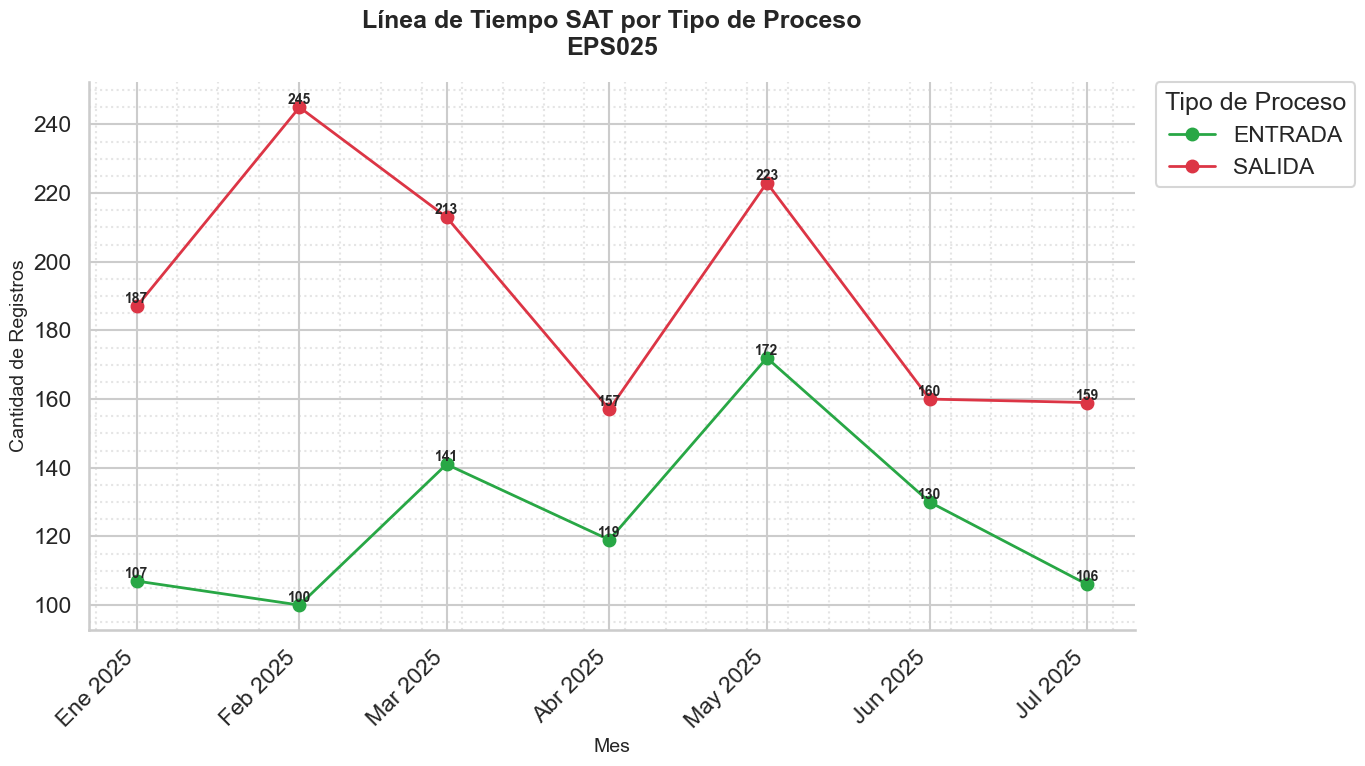

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib as mpl

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']

# Asegurarse de que la columna COL1 esté en formato de fecha
df_sat_limpio['COL1'] = pd.to_datetime(df_sat_limpio['COL1'], format='%d-%m-%Y', errors='coerce')

# Crear una nueva columna para el mes y año
df_sat_limpio['Mes_Año'] = df_sat_limpio['COL1'].dt.to_period('M')

# Agrupar por Mes_Año y tipo_Proceso, y contar los registros
totales_por_mes = df_sat_limpio.groupby(['Mes_Año', 'tipo_Proceso']).size().reset_index(name='Total')

# Pivotar los datos para que cada tipo_Proceso sea una columna
timeline = totales_por_mes.pivot(index='Mes_Año', columns='tipo_Proceso', values='Total').fillna(0)

# Estilo y paleta
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Índice de fechas (Timestamp)
idx = timeline.index.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 8))

# Aplicar los colores estandarizados en el plot
for column in timeline.columns:
    y = timeline[column].values
    color = colores_proceso.get(column, 'gray') # Asigna el color estandarizado
    ax.plot(idx, y, marker='o', linewidth=2, label=column, color=color)

    # Etiqueta cada punto
    for x, val in zip(idx, y):
        if val > 0:
            ax.text(x, val, f"{int(val)}",
                    va='bottom', ha='center',
                    fontsize=10, fontweight='bold')

# Formato de eje X con etiquetas en español
ax.set_xticks(idx)
ax.set_xticklabels(
    [f"{spanish_abbr[d.month]} {d.year}" for d in idx],
    rotation=45,
    ha='right'
)

# Despine y grillas secundarias
sns.despine(ax=ax)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

# Títulos y ejes
ax.set_title(
    f'Línea de Tiempo SAT por Tipo de Proceso\n{Regimen}',
    fontsize=18, fontweight='bold', pad=20
)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('Cantidad de Registros', fontsize=14)

# Leyenda fuera del plot
ax.legend(
    title='Tipo de Proceso',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

## 5.1. Composición Mensual de Entradas vs Salidas (SAT)

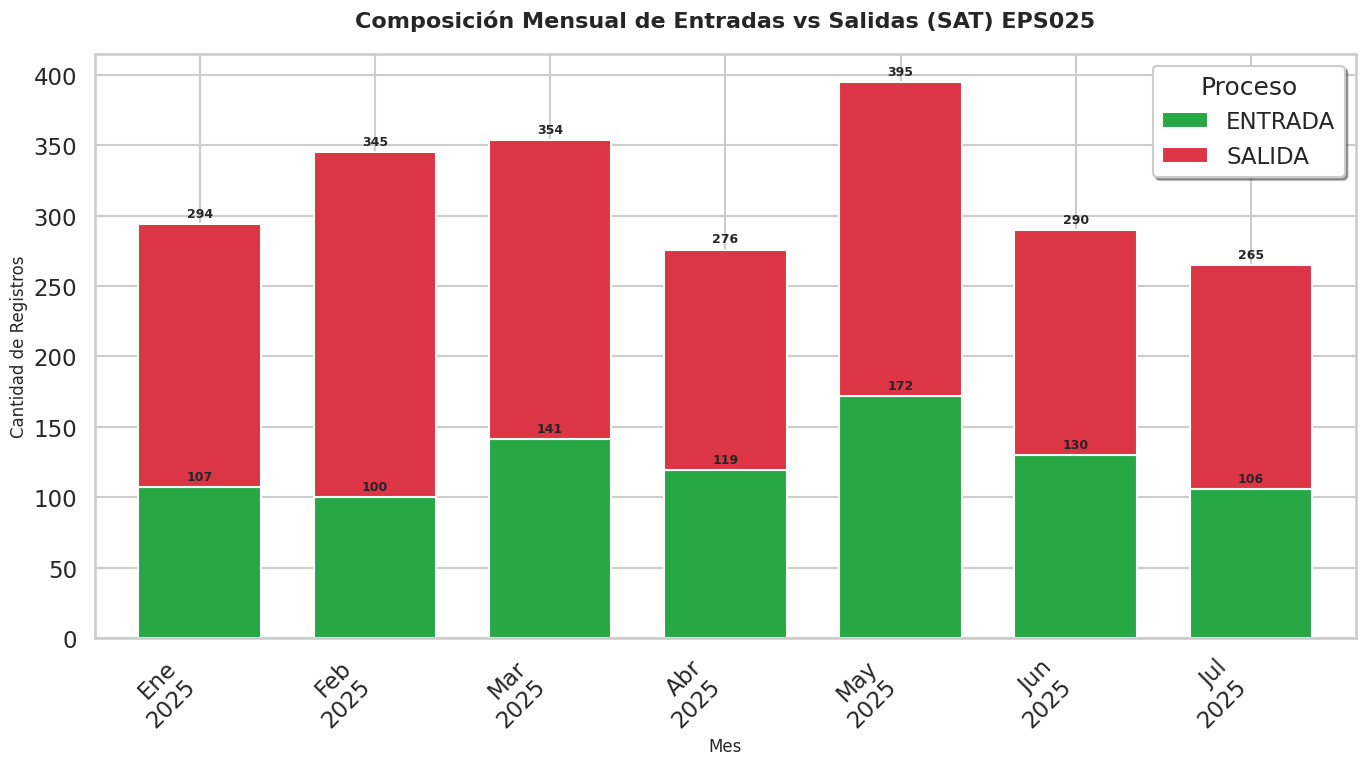

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# Se asume que df_sat_limpio ya está cargado y limpio.
# Los diccionarios de colores y abreviaciones de meses
# se definen para asegurar la consistencia.
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']

# Asegurarse de que la columna 'COL1' esté en formato de fecha
df_sat_limpio['COL1'] = pd.to_datetime(df_sat_limpio['COL1'], errors='coerce')

# Agrupar los datos por mes y por proceso
df_comp_proceso = df_sat_limpio.groupby(['Mes_Año', 'tipo_Proceso']).size().unstack(fill_value=0)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(14, 8))
df_comp_proceso.plot(
    kind='bar',
    ax=ax,
    stacked=True,
    color=[colores_proceso.get(c, 'gray') for c in df_comp_proceso.columns],
    width=0.7
)

# Personalizar el gráfico
ax.set_title(f'Composición Mensual de Entradas vs Salidas (SAT) {Regimen}', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Cantidad de Registros', fontsize=12)
ax.legend(title='Proceso', frameon=True, fancybox=True, shadow=True)

# Formatear el eje X para mostrar los meses en español
labels = [f"{spanish_abbr[period.month]}\n{period.year}" for period in df_comp_proceso.index.to_timestamp()]
ax.set_xticklabels(labels, rotation=45, ha='right')

# Añadir etiquetas de datos en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, fontweight='bold', padding=3)

# Crear la carpeta si no existe
os.makedirs(R_Salida_IMG, exist_ok=True)

# Guardar la imagen
nombre_archivo = f"Composición Mensual de Entradas vs Salidas SAT {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout()
plt.show()

## 5.2. Balance Neto y Acumulado de Registros SAT

C:\Users\crist\AppData\Local\Temp\ipykernel_25112\2068604339.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_x, rotation=45, ha='right')


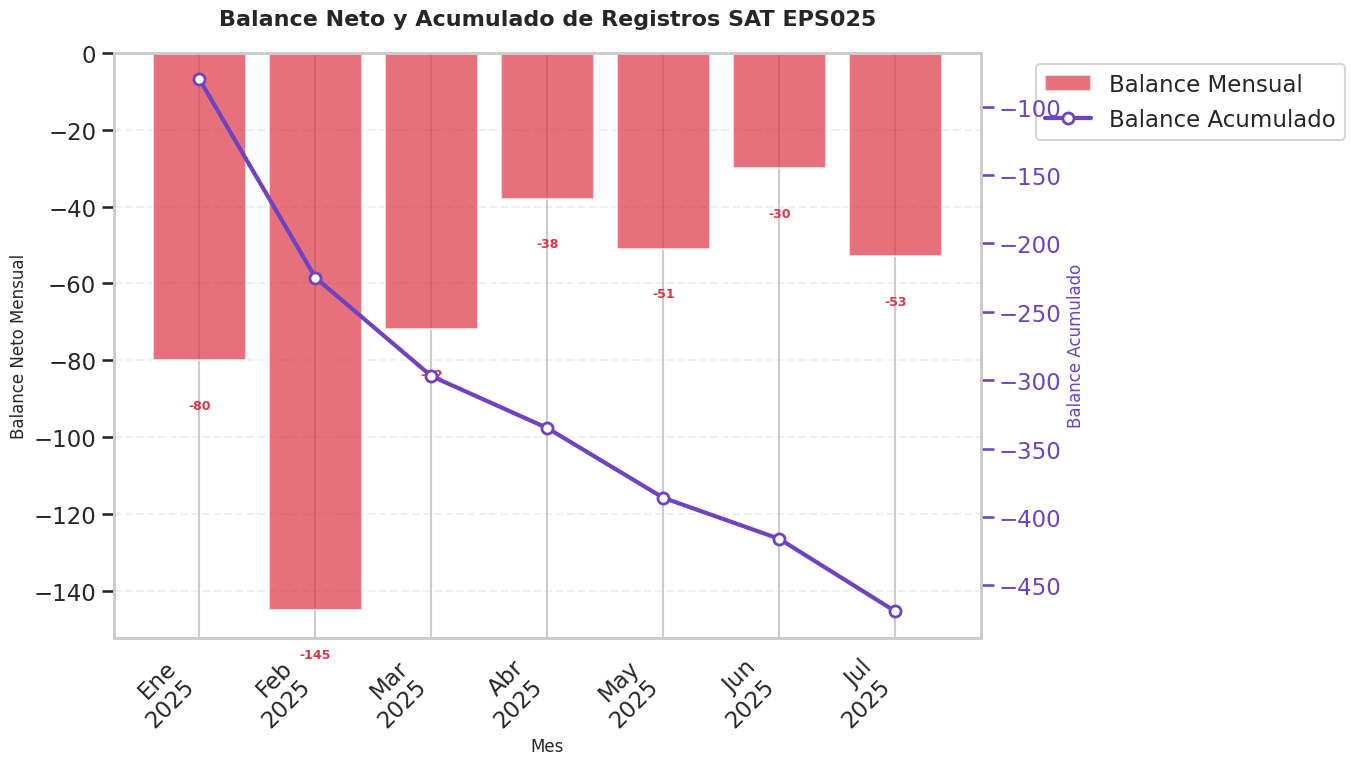

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# Se asume que df_sat_limpio ya está cargado y limpio.

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']

# Asegurarse de que la columna 'COL1' esté en formato de fecha
df_sat_limpio['COL1'] = pd.to_datetime(df_sat_limpio['COL1'], errors='coerce')

# Calcular el balance mensual y acumulado
balance_mensual = df_sat_limpio.groupby(df_sat_limpio['COL1'].dt.to_period('M'))['tipo_Proceso'].value_counts().unstack(fill_value=0)
balance_mensual_neto = balance_mensual.get('ENTRADA', 0) - balance_mensual.get('SALIDA', 0)
balance_acumulado = balance_mensual_neto.cumsum()

# Crear la gráfica
fig, ax = plt.subplots(figsize=(14, 8))

# Barras para el balance neto mensual
bars = ax.bar(
    balance_mensual_neto.index.astype(str),
    balance_mensual_neto.values,
    color=[colores_proceso['ENTRADA'] if x >= 0 else colores_proceso['SALIDA'] for x in balance_mensual_neto.values],
    alpha=0.7,
    label='Balance Mensual'
)

# Línea para el balance acumulado en un eje secundario
ax2 = ax.twinx()
ax2.plot(
    balance_acumulado.index.astype(str),
    balance_acumulado.values,
    'o-',
    color='#6f42c1',  # Color morado para la línea de tendencia acumulada
    linewidth=3,
    markersize=8,
    label='Balance Acumulado',
    markerfacecolor='white', markeredgewidth=2
)

# Personalizar el gráfico
ax.set_title(f'Balance Neto y Acumulado de Registros SAT {Regimen}', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Balance Neto Mensual', fontsize=12)
ax2.set_ylabel('Balance Acumulado', fontsize=12, color='#6f42c1')
ax2.tick_params(axis='y', colors='#6f42c1')
ax.axhline(0, color='black', linewidth=0.5)

# Ocultar la cuadrícula del eje Y
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax2.grid(False)

# Formatear el eje X para mostrar los meses en español
labels_x = [f"{spanish_abbr[period.month]}\n{period.year}" for period in balance_mensual_neto.index]
ax.set_xticklabels(labels_x, rotation=45, ha='right')

# Añadir etiquetas de datos en las barras
for bar in bars:
    height = bar.get_height()
    text_color = colores_proceso['ENTRADA'] if height >= 0 else colores_proceso['SALIDA']
    
    # Ajustar la posición y el estilo del texto para evitar superposiciones
    if height >= 0:
        y_position = height + 10  # 10 es un offset para posicionar el texto un poco más arriba
        va_align = 'bottom'
    else:
        y_position = height - 10  # 10 es un offset para posicionar el texto un poco más abajo
        va_align = 'top'
        
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        y_position,
        f'{int(height)}',
        ha='center',
        va=va_align,
        fontsize=9,
        fontweight='bold',
        color=text_color
    )

# Leyenda combinada
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.05, 1.0))

# Guardar la imagen
nombre_archivo = f"Balance Neto y Acumulado de Registros SAT {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')


plt.tight_layout()
plt.show()

## 5.3. Distribución de Registros SAT por Categoría de Documento

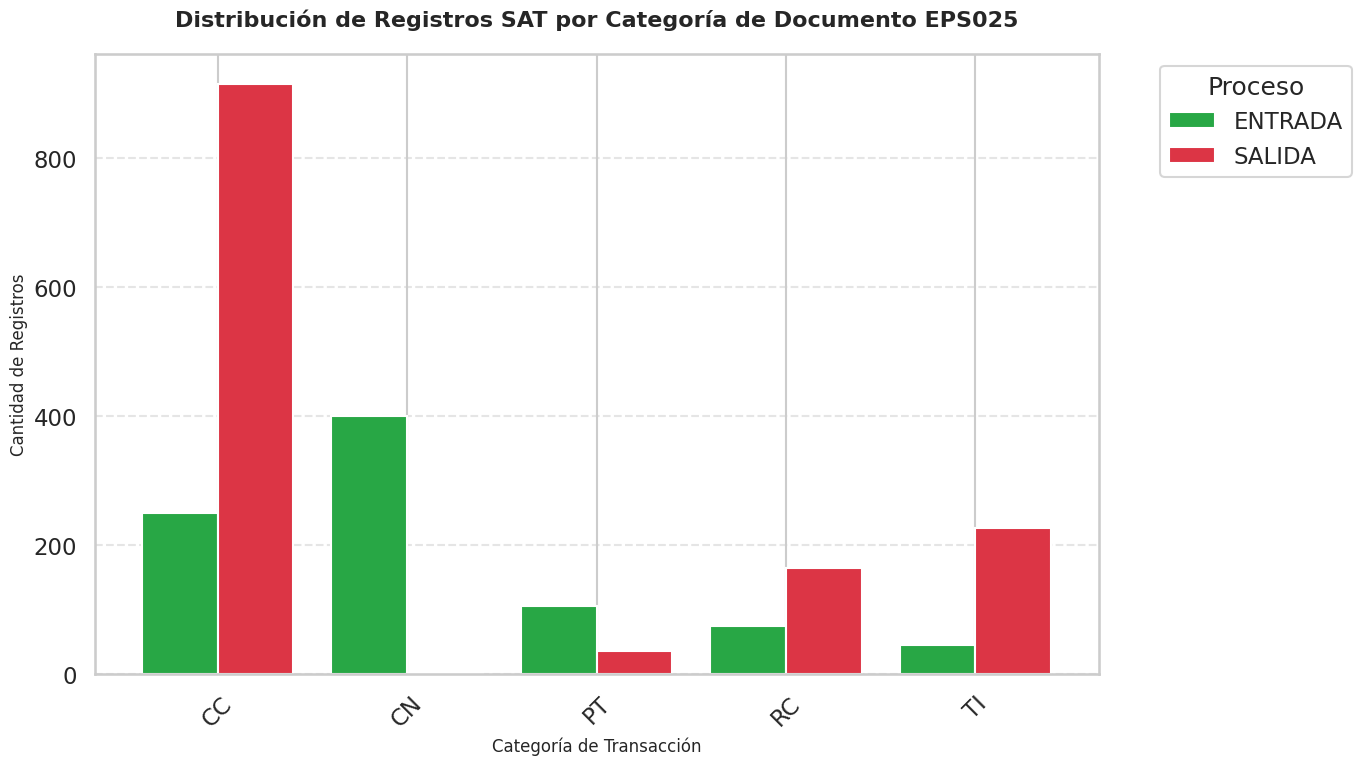

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# Se asume que df_sat_limpio ya está cargado y limpio.
# Se asume que los diccionarios de colores y abreviaciones ya están definidos.

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']

# 1. Crear una nueva columna categórica a partir de 'unique_id'
df_sat_limpio['unique_id_cat'] = df_sat_limpio['unique_id'].str.split(' ').str[0]

# 2. Agrupar los datos para la gráfica de barras agrupadas
conteo_por_categoria = df_sat_limpio.groupby(['unique_id_cat', 'tipo_Proceso']).size().unstack(fill_value=0)

# 3. Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 8))
conteo_por_categoria.plot(
    kind='bar',
    ax=ax,
    color=[colores_proceso.get(c, 'gray') for c in conteo_por_categoria.columns],
    width=0.8
)

# 4. Personalizar el gráfico
ax.set_title(f'Distribución de Registros SAT por Categoría de Documento {Regimen}', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Categoría de Transacción', fontsize=12)
ax.set_ylabel('Cantidad de Registros', fontsize=12)
ax.legend(title='Proceso', loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Guardar la imagen
nombre_archivo = f"DR SAT por Categoría de Documento {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout()
plt.show()

## 5.4. Proyección del Balance Acumulado de Registros SAT

e:\Proyectos Python\capresoca-data-automation\venv\Lib\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
e:\Proyectos Python\capresoca-data-automation\venv\Lib\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


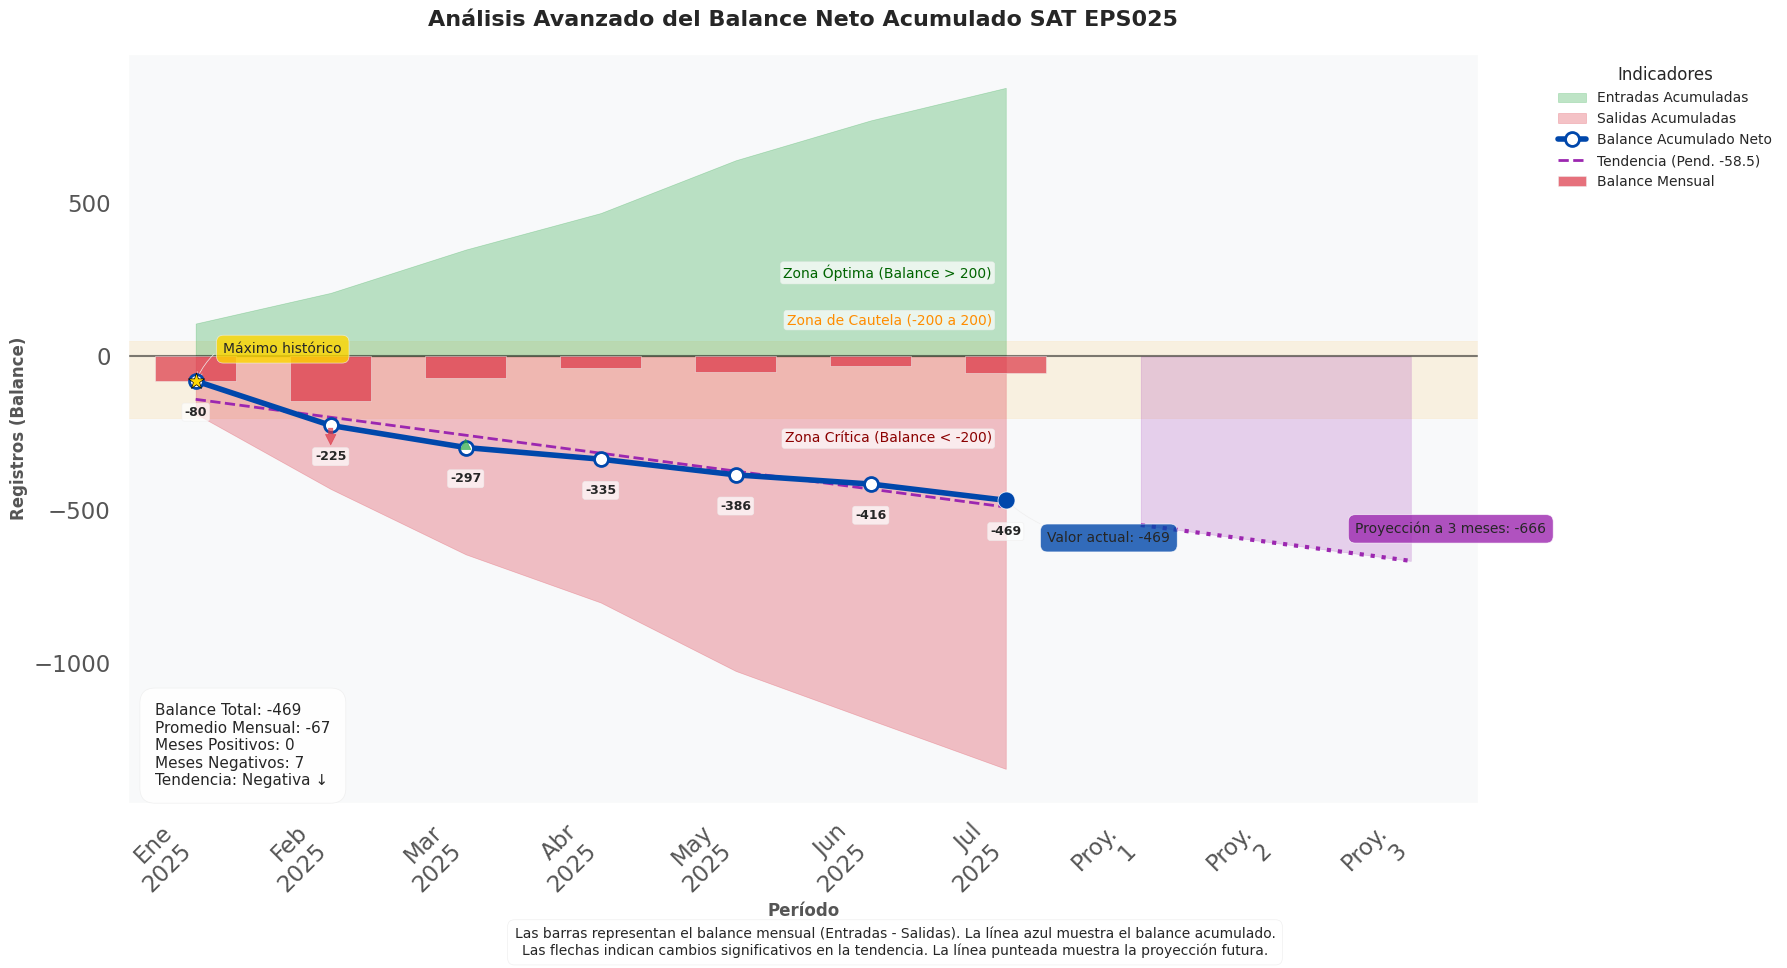

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}

spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']

# --- Datos para el análisis ---
# Asumiendo que las variables balance_mensual, balance_mensual_neto, etc. ya están definidas
if 'df_sat_limpio' in locals():
    df_sat_limpio['COL1'] = pd.to_datetime(df_sat_limpio['COL1'], errors='coerce')
    balance_mensual = df_sat_limpio.groupby(df_sat_limpio['COL1'].dt.to_period('M'))['tipo_Proceso'].value_counts().unstack(fill_value=0)
    balance_mensual_neto = balance_mensual.get('ENTRADA', 0) - balance_mensual.get('SALIDA', 0)
    balance_acumulado = balance_mensual_neto.cumsum()
    flujo_acum = balance_mensual.cumsum()


plt.figure(figsize=(18, 10))

plt.style.use('ggplot')
ax = plt.gca()
ax.set_facecolor('#f8f9fa')
plt.grid(True, alpha=0.3, color='gray', linestyle=':')

# SECCIÓN 1: ÁREA ACUMULADA CON DESCOMPOSICIÓN
x = np.arange(len(balance_mensual))
entradas_acum = flujo_acum['ENTRADA'].values
salidas_acum = flujo_acum['SALIDA'].values

plt.fill_between(x, 0, entradas_acum, alpha=0.3, color=colores_proceso['ENTRADA'], label='Entradas Acumuladas')
plt.fill_between(x, 0, -salidas_acum, alpha=0.3, color=colores_proceso['SALIDA'], label='Salidas Acumuladas')

# SECCIÓN 2: LÍNEAS DE BALANCE NETO Y ACUMULADO
bars = plt.bar(x, balance_mensual_neto, 
               color=[colores_proceso['ENTRADA'] if val >= 0 else colores_proceso['SALIDA'] for val in balance_mensual_neto], 
               alpha=0.7, width=0.6, label='Balance Mensual', zorder=3)

plt.plot(x, balance_acumulado, 'o-', color='#0047AB', linewidth=4, 
         markersize=10, markerfacecolor='white', markeredgewidth=2,
         label='Balance Acumulado Neto', zorder=4)

# SECCIÓN 3: ANÁLISIS DE TENDENCIA Y PROYECCIÓN
z = np.polyfit(x, balance_acumulado, 1)
p = np.poly1d(z)
tendency = p(x)
future_x = np.arange(len(x), len(x) + 3)
future_tendency = p(future_x)

plt.plot(x, tendency, '--', color='#9C27B0', linewidth=2, 
         label=f'Tendencia (Pend. {z[0]:.1f})', zorder=2)
plt.plot(future_x, future_tendency, ':', color='#9C27B0', linewidth=3, zorder=2)
plt.fill_between(future_x, future_tendency, alpha=0.2, color='#9C27B0')

# SECCIÓN 4: TASAS DE CAMBIO Y VELOCIDAD
delta_absoluto = balance_acumulado.diff().fillna(0)
delta_porcentual = delta_absoluto / balance_acumulado.shift(1).abs() * 100

for i in range(1, len(balance_acumulado)-1):
    aceleracion = delta_absoluto.iloc[i] - delta_absoluto.iloc[i-1]
    
    if abs(aceleracion) > np.mean(np.abs(delta_absoluto)):
        color = colores_proceso['ENTRADA'] if aceleracion > 0 else colores_proceso['SALIDA']
        arrow = FancyArrowPatch(
            (i, balance_acumulado.iloc[i]),
            (i, balance_acumulado.iloc[i] + aceleracion/2),
            mutation_scale=15, color=color, alpha=0.7, zorder=5
        )
        ax.add_patch(arrow)

# SECCIÓN 5: ANOTACIONES Y CONTEXTO
for i, acum in enumerate(balance_acumulado):
    plt.annotate(f"{int(acum)}", 
                 xy=(i, acum),
                 xytext=(0, 10 if acum >= 0 else -25), 
                 textcoords='offset points',
                 ha='center', fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))
    
    if (i > 0 and i < len(balance_acumulado)-1 and 
        ((acum > balance_acumulado.iloc[i-1] and acum > balance_acumulado.iloc[i+1]) or
         (acum < balance_acumulado.iloc[i-1] and acum < balance_acumulado.iloc[i+1]))):
        plt.scatter(i, acum, s=120, marker='*', color='gold', edgecolor='black', zorder=6)

max_index = balance_acumulado.argmax()
current_index = len(balance_acumulado) - 1

plt.scatter(max_index, balance_acumulado.iloc[max_index], s=150, marker='*', 
            color='gold', edgecolor='black', zorder=6)
plt.scatter(current_index, balance_acumulado.iloc[current_index], s=150, 
            marker='o', color='#0047AB', edgecolor='white', zorder=6)

plt.annotate('Máximo histórico', 
             xy=(max_index, balance_acumulado.iloc[max_index]),
             xytext=(20, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'),
             bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.8))

plt.annotate(f'Valor actual: {int(balance_acumulado.iloc[-1])}', 
             xy=(current_index, balance_acumulado.iloc[current_index]),
             xytext=(30, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.2'),
             bbox=dict(boxstyle='round,pad=0.5', fc='#0047AB', color='white', alpha=0.8))

# SECCIÓN 6: CONTEXTO Y COMPARATIVAS
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5, zorder=1)

# === ZONAS DE REFERENCIA (CORREGIDAS) ===
# Definir umbrales fijos que tengan sentido para el negocio (ajusta estos valores según sea necesario)
umbral_critico_neg = -200
umbral_cautela_pos = 50
umbral_optimo_pos = 200

# Zonas de color
plt.axhspan(-np.inf, umbral_critico_neg, alpha=0.1, color=colores_proceso['SALIDA'], zorder=0)
plt.axhspan(umbral_critico_neg, umbral_cautela_pos, alpha=0.1, color='orange', zorder=0)
plt.axhspan(umbral_cautela_pos, np.inf, alpha=0.1, color=colores_proceso['ENTRADA'], zorder=0)


# Anotaciones para las zonas
plt.annotate('Zona Crítica (Balance < -200)', xy=(len(balance_mensual) - 1, umbral_critico_neg),
             xytext=(-10, -10), textcoords='offset points', ha='right', va='top',
             fontsize=10, color='darkred', bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))
plt.annotate('Zona de Cautela (-200 a 200)', xy=(len(balance_mensual) - 1, umbral_cautela_pos),
             xytext=(-10, 10), textcoords='offset points', ha='right', va='bottom',
             fontsize=10, color='darkorange', bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))
plt.annotate('Zona Óptima (Balance > 200)', xy=(len(balance_mensual) - 1, umbral_optimo_pos),
             xytext=(-10, 10), textcoords='offset points', ha='right', va='bottom',
             fontsize=10, color='darkgreen', bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))


# === ANOTACIÓN DE PROYECCIÓN (REINCORPORADA) ===
plt.annotate(f'Proyección a 3 meses: {int(future_tendency[-1])}', 
             xy=(future_x[-1], future_tendency[-1]),
             xytext=(-40, 20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='#9C27B0', color='white', alpha=0.8),
             fontsize=10)


# SECCIÓN 7: ESTADÍSTICAS CLAVE
promedio_balance = balance_mensual_neto.mean()
balance_total = balance_acumulado.iloc[-1]
meses_positivos = (balance_mensual_neto > 0).sum()
meses_negativos = (balance_mensual_neto < 0).sum()

stats_text = (
    f"Balance Total: {int(balance_total)}\n"
    f"Promedio Mensual: {int(promedio_balance)}\n"
    f"Meses Positivos: {meses_positivos}\n"
    f"Meses Negativos: {meses_negativos}\n"
    f"Tendencia: {'Positiva ↑' if z[0] > 0 else 'Negativa ↓'}"
)

plt.annotate(stats_text, xy=(0.02, 0.02), xycoords='axes fraction',
             bbox=dict(boxstyle='round,pad=1', fc='white', alpha=0.9),
             fontsize=11, va='bottom')

# SECCIÓN 8: MEJORAS ESTÉTICAS Y FINALIZACIÓN
plt.title(f'Análisis Avanzado del Balance Neto Acumulado SAT {Regimen}', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Período', fontsize=12, fontweight='bold')
plt.ylabel('Registros (Balance)', fontsize=12, fontweight='bold')
labels_x = [f"{spanish_abbr[period.month]}\n{period.year}" for period in balance_mensual.index.to_timestamp()]
future_labels = [f"Proy.\n{i+1}" for i in range(len(future_x))]
all_x_ticks = np.concatenate([np.arange(len(balance_mensual)), future_x])
all_labels = labels_x + future_labels
plt.xticks(all_x_ticks, all_labels, rotation=45, ha='right')
plt.xlim(-0.5, len(balance_mensual) + 2.5)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0),
           frameon=False, fontsize=10, title='Indicadores', title_fontsize=12)

plt.figtext(0.5, 0.01, 
            "Las barras representan el balance mensual (Entradas - Salidas). La línea azul muestra el balance acumulado.\n"
            "Las flechas indican cambios significativos en la tendencia. La línea punteada muestra la proyección futura.",
            ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.9))
plt.grid(False)

# Guardar la imagen
nombre_archivo = f"Análisis Avanzado del Balance Neto Acumulado SAT {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## 5.5. Dashboard Analítico de Procesos SAT

C:\Users\crist\AppData\Local\Temp\ipykernel_25112\527481730.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


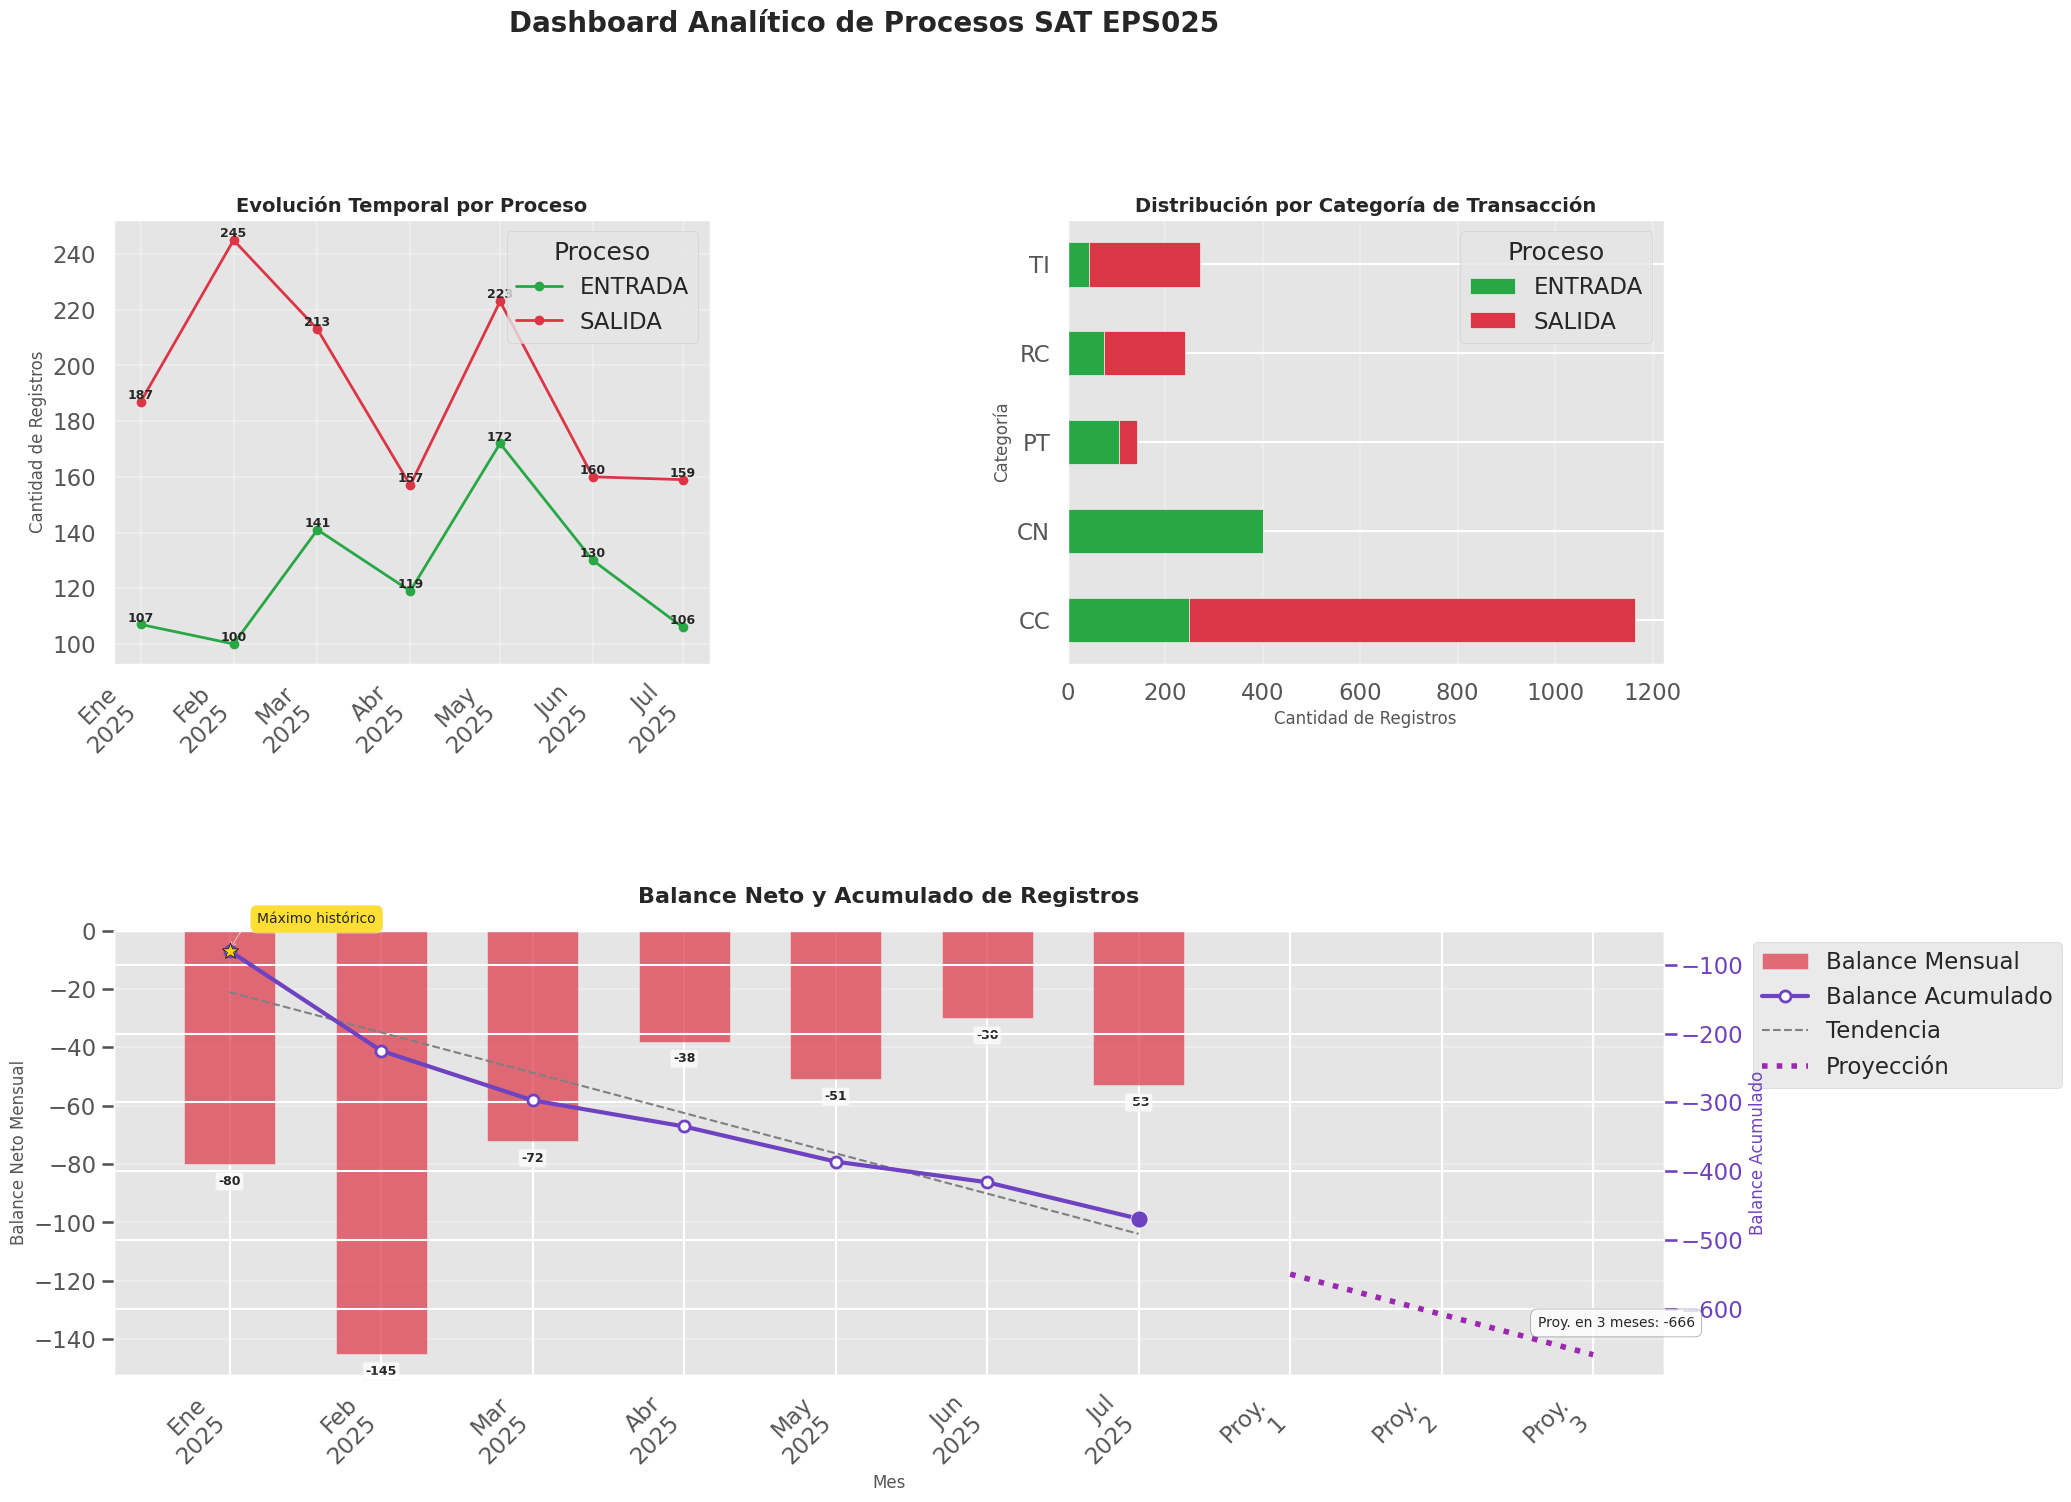

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.gridspec as gridspec

# --- PALETA DE COLORES ESTANDARIZADA ---
colores_proceso = {
    'ENTRADA': '#28a745',  # Verde pasto
    'SALIDA': '#dc3545'      # Rojo ladrillo
}
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']

# --- Datos para el análisis ---
df_sat_limpio['COL1'] = pd.to_datetime(df_sat_limpio['COL1'], errors='coerce')

balance_mensual = df_sat_limpio.groupby(df_sat_limpio['COL1'].dt.to_period('M'))['tipo_Proceso'].value_counts().unstack(fill_value=0)
balance_mensual_neto = balance_mensual.get('ENTRADA', 0) - balance_mensual.get('SALIDA', 0)
balance_acumulado = balance_mensual_neto.cumsum()
flujo_acum = balance_mensual.cumsum()

x = np.arange(len(balance_acumulado))
z = np.polyfit(x, balance_acumulado.values, 1)
p = np.poly1d(z)
future_x = np.arange(len(x), len(x) + 3)
future_tendency = p(future_x)


# --- CREACIÓN DEL DASHBOARD CON DISEÑO DE GRID FLEXIBLE ---
# Se aumenta el tamaño de la figura para una mejor visualización
fig = plt.figure(figsize=(20, 15))
fig.suptitle(f'Dashboard Analítico de Procesos SAT {Regimen}', fontsize=20, fontweight='bold', y=1.02)

# Usamos GridSpec para un control preciso de los subgráficos
# Creamos una cuadrícula de 2 filas y 2 columnas
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.6, wspace=0.6)

# GRÁFICA 1: Evolución Temporal por Proceso
# Se ubica en la primera fila, primera columna
ax1 = fig.add_subplot(gs[0, 0])
timeline_simple = df_sat_limpio.groupby(['Mes_Año', 'tipo_Proceso']).size().unstack(fill_value=0)
idx_timeline = timeline_simple.index.to_timestamp()
for proceso in timeline_simple.columns:
    color = colores_proceso.get(proceso, 'gray')
    ax1.plot(idx_timeline, timeline_simple[proceso], marker='o', linewidth=2, label=proceso, color=color, markersize=6)
    for i, val in enumerate(timeline_simple[proceso].values):
        ax1.text(idx_timeline[i], val, f"{int(val)}", va='bottom', ha='center', fontsize=9, fontweight='bold')
ax1.set_title('Evolución Temporal por Proceso', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cantidad de Registros')
ax1.legend(title='Proceso')
ax1.grid(True, alpha=0.3)
labels_ax1 = [f"{spanish_abbr[d.month]}\n{d.year}" for d in idx_timeline]
ax1.set_xticks(idx_timeline)
ax1.set_xticklabels(labels_ax1, rotation=45, ha='right')


# GRÁFICA 2: Distribución por Categoría de Transacción (Horizontal)
# Se ubica en la primera fila, segunda columna
ax2 = fig.add_subplot(gs[0, 1])
df_sat_limpio['unique_id_cat'] = df_sat_limpio['unique_id'].str.split(' ').str[0]
conteo_por_categoria = df_sat_limpio.groupby(['unique_id_cat', 'tipo_Proceso']).size().unstack(fill_value=0)
conteo_por_categoria.plot(
    kind='barh',
    ax=ax2,
    stacked=True,
    color=[colores_proceso.get(c, 'gray') for c in conteo_por_categoria.columns]
)
ax2.set_title('Distribución por Categoría de Transacción', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de Registros')
ax2.set_ylabel('Categoría')
ax2.grid(True, axis='x', alpha=0.3)
ax2.legend(title='Proceso')


# GRÁFICA 3: Balance Neto y Acumulado
# Se ubica en la segunda fila, ocupando ambas columnas (de ahí el gs[1, :])
ax3 = fig.add_subplot(gs[1, :])
bars = ax3.bar(
    np.arange(len(balance_mensual_neto)),
    balance_mensual_neto.values,
    color=[colores_proceso['ENTRADA'] if x >= 0 else colores_proceso['SALIDA'] for x in balance_mensual_neto.values],
    alpha=0.7,
    width=0.6,
    label='Balance Mensual',
    zorder=3
)
ax3_twin = ax3.twinx()
ax3_twin.plot(
    np.arange(len(balance_acumulado)),
    balance_acumulado.values,
    'o-',
    color='#6f42c1',
    linewidth=3,
    markersize=8,
    label='Balance Acumulado',
    markerfacecolor='white', markeredgewidth=2,
    zorder=4
)
tendency = p(np.arange(len(balance_acumulado)))
ax3_twin.plot(
    np.arange(len(balance_acumulado)),
    tendency,
    '--',
    color='gray',
    linewidth=1.5,
    label='Tendencia',
    zorder=2
)
ax3_twin.plot(
    future_x,
    future_tendency,
    ':',
    color='#9C27B0',
    linewidth=4,
    label='Proyección',
    zorder=2
)
max_index = balance_acumulado.argmax()
current_index = len(balance_acumulado) - 1
ax3_twin.scatter(max_index, balance_acumulado.iloc[max_index], s=150, marker='*', color='gold', edgecolor='black', zorder=6)
ax3_twin.scatter(current_index, balance_acumulado.iloc[current_index], s=150, marker='o', color='#6f42c1', edgecolor='white', zorder=6)
ax3_twin.annotate('Máximo histórico', xy=(max_index, balance_acumulado.iloc[max_index]), xytext=(20, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'), bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.8), fontsize=10)
ax3_twin.annotate(f'Proy. en 3 meses: {int(future_tendency[-1])}', xy=(future_x[-1], future_tendency[-1]), xytext=(-40, 20), textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8), fontsize=10)
for bar in bars:
    height = bar.get_height()
    if height != 0:
        ax3.annotate(f"{int(height)}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 10 if height >= 0 else -15), textcoords='offset points', ha='center', fontsize=9, fontweight='bold', bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

ax3.set_title('Balance Neto y Acumulado de Registros', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Mes')
ax3.set_ylabel('Balance Neto Mensual')
ax3_twin.set_ylabel('Balance Acumulado', color='#6f42c1')
ax3_twin.tick_params(axis='y', colors='#6f42c1')
ax3.axhline(0, color='black', linewidth=0.5)
ax3.grid(True, axis='y', alpha=0.3)
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.05, 1.0))

labels_ax3 = [f"{spanish_abbr[period.month]}\n{period.year}" for period in balance_mensual_neto.index.to_timestamp()]
future_labels = [f"Proy.\n{i+1}" for i in range(len(future_x))]
all_labels = labels_ax3 + future_labels
ax3.set_xticks(np.concatenate([np.arange(len(balance_mensual_neto)), future_x]))
ax3.set_xticklabels(all_labels, rotation=45, ha='right')

# Guardar la imagen
nombre_archivo = f"Dashboard Analítico de Procesos SAT {Regimen}.png"
ruta_completa = os.path.join(R_Salida_IMG, nombre_archivo)
plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 6. Guardar Dataframe

## 6.1. Estandarización dataframe de salida

In [54]:
# Eliminar las columnas especificadas
df_sat_limpio = df_sat_limpio.drop(columns=['COL64', 'unique_id', 'fec_maestro', 'unique_id_cat'])

# Crear la nueva columna 'Tipo_Archivo' y asignar el valor "SAT" a todos los registros
df_sat_limpio['Tipo_Archivo'] = "SAT"
df_sat_limpio['Tipo_Reporte'] = "SAT"
df_sat_limpio['Tipo_Regimen'] = Regimen

# Renombrar las columnas según lo solicitado
df_sat_limpio = df_sat_limpio.rename(columns={
    'COL1': 'FECHA_PROCESO',
    'COL3': 'NOMBRE_ARCHIVO',
    'COL16': 'ENT_ID_ORIGEN',
    'COL18': 'ENT_ID_RECEPTORA',
    'COL23': 'TPS_IDN_ID',
    'COL24': 'HST_IDN_NUMERO_IDENTIFICACION',
    'tipo_Proceso': 'PROCESO',
    'serial': 'AFL_ID'
})

# Mostrar el resultado para verificar
print(df_sat_limpio.columns)

Index(['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'ENT_ID_ORIGEN', 'ENT_ID_RECEPTORA',
       'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'PROCESO', 'AFL_ID',
       'Mes_Año', 'Tipo_Archivo', 'Tipo_Reporte', 'Tipo_Regimen'],
      dtype='object')


## 6.2. orden de columnas

In [55]:
df_sat_limpio = df_sat_limpio[
    ['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION',
     'PROCESO', 'Tipo_Archivo', 'Mes_Año', 'ENT_ID_ORIGEN', 'ENT_ID_RECEPTORA', 'Tipo_Reporte', 'Tipo_Regimen']
]
print(df_sat_limpio.columns)

Index(['FECHA_PROCESO', 'NOMBRE_ARCHIVO', 'AFL_ID', 'TPS_IDN_ID',
       'HST_IDN_NUMERO_IDENTIFICACION', 'PROCESO', 'Tipo_Archivo', 'Mes_Año',
       'ENT_ID_ORIGEN', 'ENT_ID_RECEPTORA', 'Tipo_Reporte', 'Tipo_Regimen'],
      dtype='object')


In [56]:
df_sat_limpio.to_csv(R_Salida, index=False, encoding='ansi', sep=',')